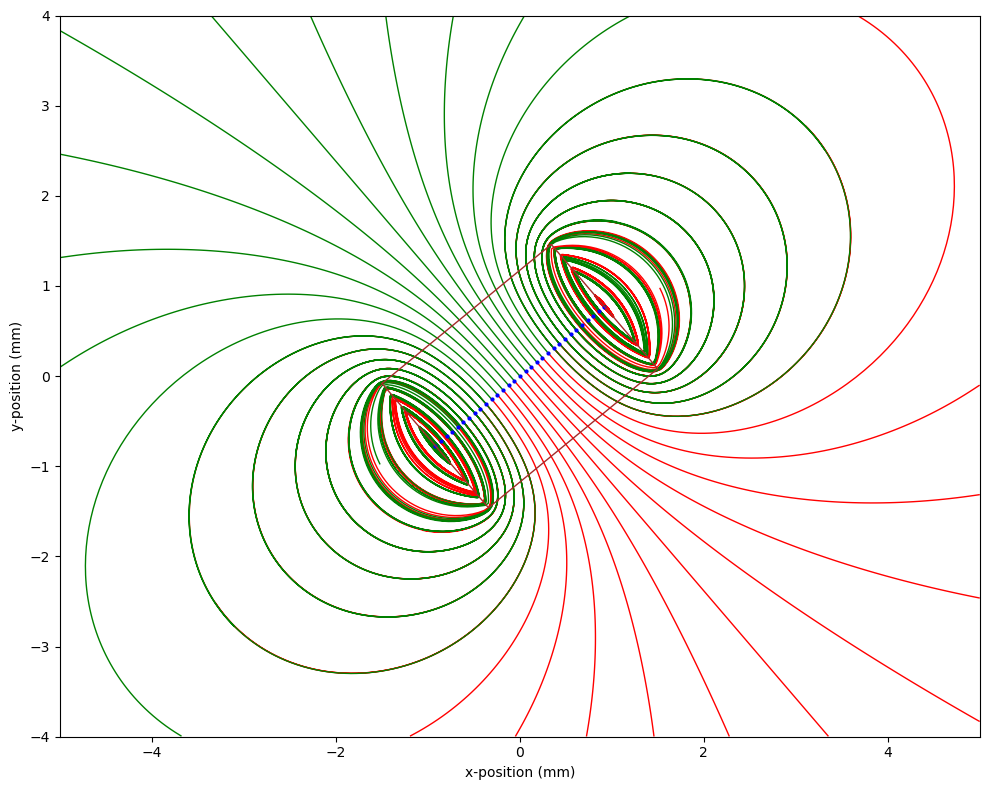

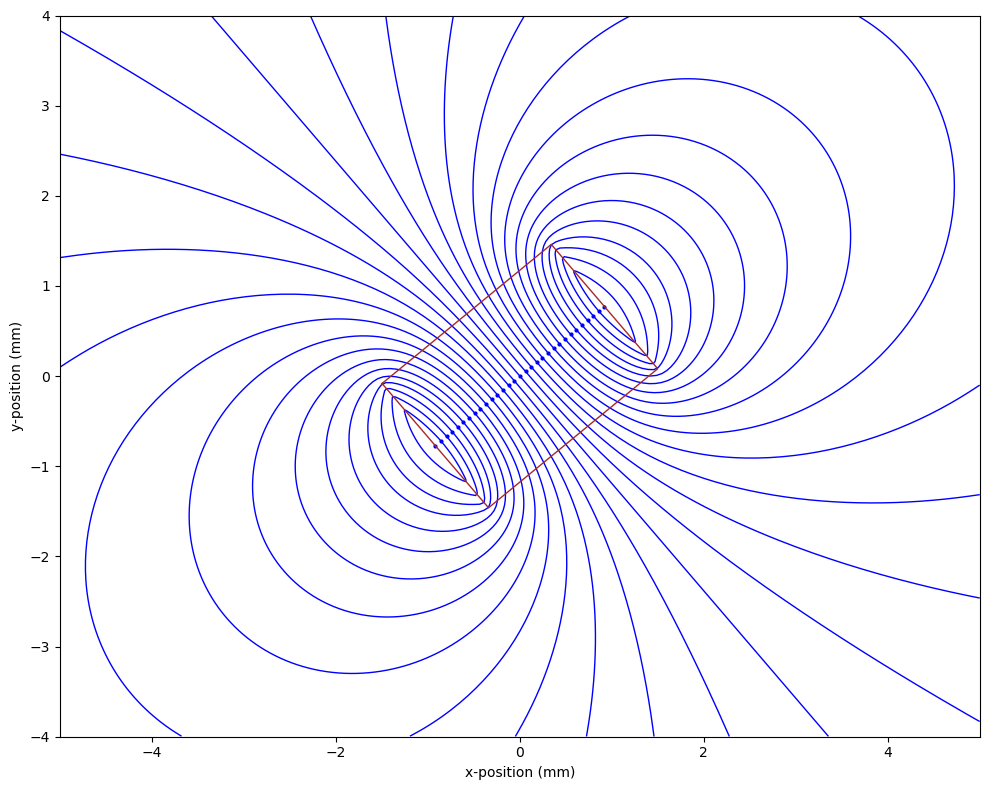

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import magpylib as magpy

from closestreamlines import (get_mpl_pairs, merge_or_close_pairs)

# Compute the B-field of a cuboid magnet on the grid
nx, ny = 500, 400  # grid size
wx, wy = 10, 8  # window size (scale 1 mm ~ 1 inch)
mx, my, mz = 2.4, 1.8, 10  # magnet size
t, td = 2*np.pi/9, 40
nisos = 31
verbose = 0
cube = magpy.magnet.Cuboid(magnetization=(0, -1000, 0), dimension=(mx, my, mz))
cube.rotate_from_angax(40, "z")

# Create an observer grid in the xz-symmetry plane
tsx = -wx/2+wx*(np.arange(nx)+0.5)/nx
tsy = -wy/2+wy*(np.arange(ny)+0.5)/ny
grid = np.moveaxis(np.array(np.meshgrid(tsx, tsy, [0]))[:,:,:,0], 0, -1)

# Compute the B-field of a cuboid magnet on the grid
cube = magpy.magnet.Cuboid(magnetization=(0, -1000, 0), dimension=(mx, my, mz))
cube.rotate_from_angax(td, 'z')
B = cube.getB(grid)
x, y, u, v = grid[:,:,0], grid[:,:,1], B[:, :, 0], B[:, :, 1]

# Define starting points
xp = np.linspace(-mx*np.cos(t)/2, mx*np.cos(t)/2, nisos)
yp = np.linspace(-mx*np.sin(t)/2, mx*np.sin(t)/2, nisos)
seeds = np.array([xp, yp]).T

# Create a Matplotlib figure for building streamlines
fig, ax = plt.subplots(figsize=(wx, wy))
ax.set_xlim([-wx/2, wx/2])
ax.set_ylim([-wy/2, wy/2])
# Display the B-field with streamplot for retrieving the streamlines
splt = ax.streamplot(x, y, u, v, start_points=seeds, broken_streamlines=False, density=5)
plt.close()  # Prevents an actual display

# Extract raw line pairs associated to seeds from the matplotlib streamplot object
pairs = get_mpl_pairs(splt, seeds)

# Close or merge streamline pairs
lines = merge_or_close_pairs(pairs, verbose=verbose)

# Magnet corner points
x0 = -mx*np.cos(2*np.pi/9)/2-my*np.sin(2*np.pi/9)/2
x1 = -mx*np.cos(2*np.pi/9)/2+my*np.sin(2*np.pi/9)/2
x2 = +mx*np.cos(2*np.pi/9)/2+my*np.sin(2*np.pi/9)/2
x3 = +mx*np.cos(2*np.pi/9)/2-my*np.sin(2*np.pi/9)/2
y0 = -mx*np.sin(2*np.pi/9)/2+my*np.cos(2*np.pi/9)/2
y1 = -mx*np.sin(2*np.pi/9)/2-my*np.cos(2*np.pi/9)/2
y2 = +mx*np.sin(2*np.pi/9)/2-my*np.cos(2*np.pi/9)/2
y3 = +mx*np.sin(2*np.pi/9)/2+my*np.cos(2*np.pi/9)/2
xm, ym = [x0, x1, x2, x3, x0], [y0, y1, y2, y3, y0]

# Display streamlines before closing
# Create a Matplotlib figure again for visualization
fig, ax = plt.subplots(figsize=(wx, wy))
ax.set_xlim([-wx/2, wx/2])
ax.set_ylim([-wy/2, wy/2])
for pair in pairs:
    xl, yl = pair[0].T
    plt.plot(xl, yl, c="red", linewidth=1.0)
    xl, yl = pair[1].T
    plt.plot(xl, yl, c="green", linewidth=1.0)
plt.plot(xp, yp, 'bo', markersize=2.0)
plt.plot(xm, ym, c="brown", linewidth=1.0)
# Figure styling
ax.set(xlabel="x-position (mm)", ylabel="y-position (mm)")
plt.tight_layout()
plt.show()

# Display streamlines after closing
# Create a Matplotlib figure again for visualization
fig, ax = plt.subplots(figsize=(wx, wy))
ax.set_xlim([-wx/2, wx/2])
ax.set_ylim([-wy/2, wy/2])
for line in lines:
    xl, yl = line.T
    plt.plot(xl, yl, c="blue", linewidth=1.0)
plt.plot(xp, yp, 'bo', markersize=2.0)
plt.plot(xm, ym, c="brown", linewidth=1.0)
# Figure styling
ax.set(xlabel="x-position (mm)", ylabel="y-position (mm)")
plt.tight_layout()
plt.show()